In [ ]:
import pandas as pd 
from io import StringIO  # Import StringIO from the io module

df = pd.read_csv('results_with_nn.csv')

df['history'] = df['history'].apply(lambda x: pd.read_csv(StringIO(x), sep=r'\s+'))

# Print the DataFrame to see the result
print(df['history'][0])  # Shows the 'history' DataFrame from the first row

0    1.046594
1    0.806466
2    0.750254
3    0.741557
4    0.673342
5    0.699769
6    0.656680
7    0.693620
8    0.636184
9    0.654531
Name: loss, dtype: float64


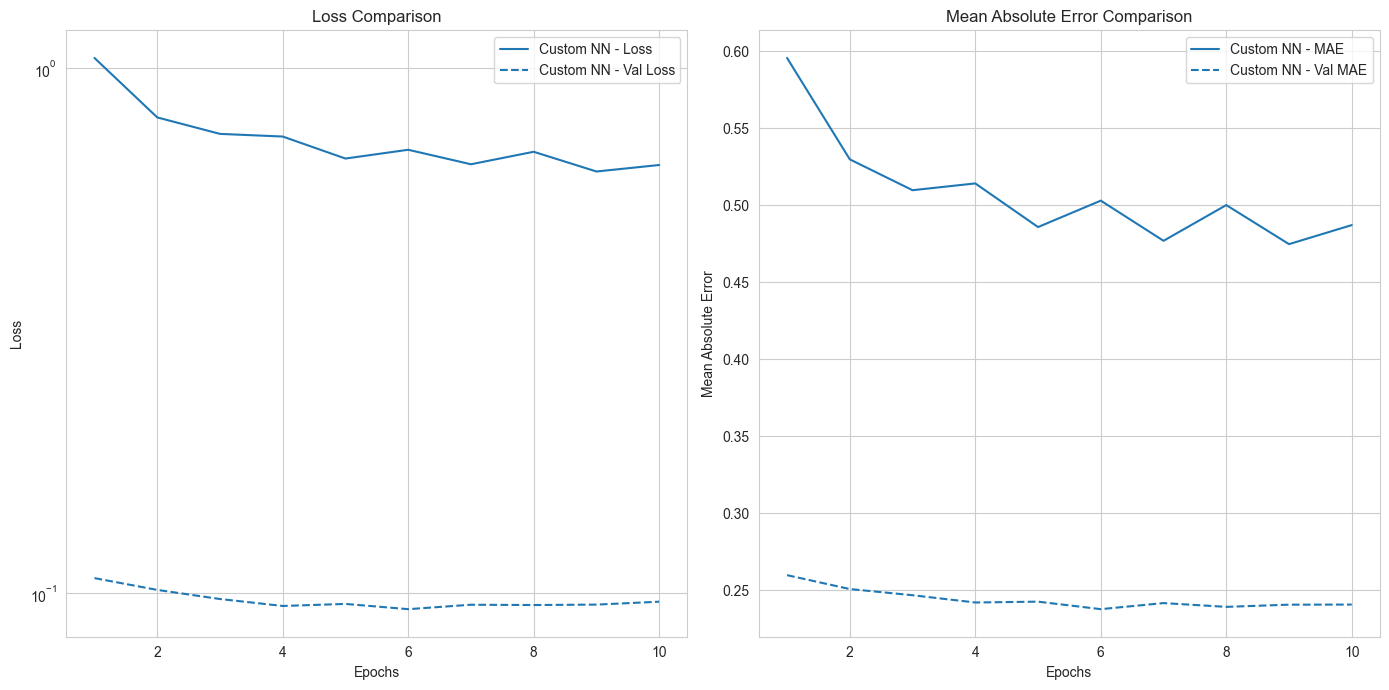

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_training_history(results_df):
    """
    Visualize training history for multiple models from a DataFrame.

    Parameters:
        results_df (pd.DataFrame): DataFrame containing model performance metrics and history.
    """
    
    # Set up color palette
    sns.set_palette("tab10")  # Use a predefined color palette for consistency

    # Initialize figures for Loss and Mean Absolute Error (MAE)
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")

    # Plot Loss Comparison
    plt.subplot(1, 2, 1)
    for i, row in results_df.iterrows():
        model_name = row['model_name']
        history = row['history']
        if 'loss' in history and 'val_loss' in history:
            epochs = range(1, len(history['loss']) + 1)
            plt.plot(epochs, history['loss'], label=f"{model_name} - Loss", linestyle='-', color=sns.color_palette()[i % len(sns.color_palette())])
            plt.plot(epochs, history['val_loss'], label=f"{model_name} - Val Loss", linestyle='--', color=sns.color_palette()[i % len(sns.color_palette())])

    plt.title("Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.yscale("log")  # Optional: Use a logarithmic scale for better visualization

    # Plot Mean Absolute Error (MAE) Comparison
    plt.subplot(1, 2, 2)
    for i, row in results_df.iterrows():
        model_name = row['model_name']
        history = row['history']
        if 'mean_absolute_error' in history and 'val_mae' in history:
            epochs = range(1, len(history['mean_absolute_error']) + 1)
            plt.plot(epochs, history['mean_absolute_error'], label=f"{model_name} - MAE", linestyle='-', color=sns.color_palette()[i % len(sns.color_palette())])
            plt.plot(epochs, history['val_mae'], label=f"{model_name} - Val MAE", linestyle='--', color=sns.color_palette()[i % len(sns.color_palette())])

    plt.title("Mean Absolute Error Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Absolute Error")
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
visualize_training_history(df)
